In [36]:
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns

# Set font parameters for plots
font = {'family': 'Arial', 'weight': 'normal', 'size': 12}
plt.rc('font', **font)

# Set DPI for plots
plt.rcParams['figure.dpi']=100

# Read in datasets as Pandas dataframes
df = pd.read_csv('data/sectorial_results_corridor.csv')
dfm = pd.read_csv('data/morvolc_result_corridor_excl.csv')

# Print the last five rows of the dataset
df.tail()

# Create pivot tables to summarize data
pivot_med_unordered = pd.pivot_table(df, index='sector', values='sector_med', columns='volcano')
pivot_mean_unordered = pd.pivot_table(df, index='sector', values='sector_mea', columns='volcano')
pivot_slopetot_unordered = pd.pivot_table(df, index='sector', values='SlopeMean(', columns='volcano')
pivot_iqr_unordered = pd.pivot_table(df, index='sector', values='sector_iqr', columns='volcano')

# Reorder pivot tables based on the order of volcanoes in the original dataset
pivot_med_df = pivot_med_unordered[df['volcano'].unique().tolist()]
pivot_mean_df = pivot_mean_unordered[df['volcano'].unique().tolist()]
pivot_slopetot_df = pivot_slopetot_unordered[df['volcano'].unique().tolist()]

### Note: Figure numbers are shown as they appear in the manuscript

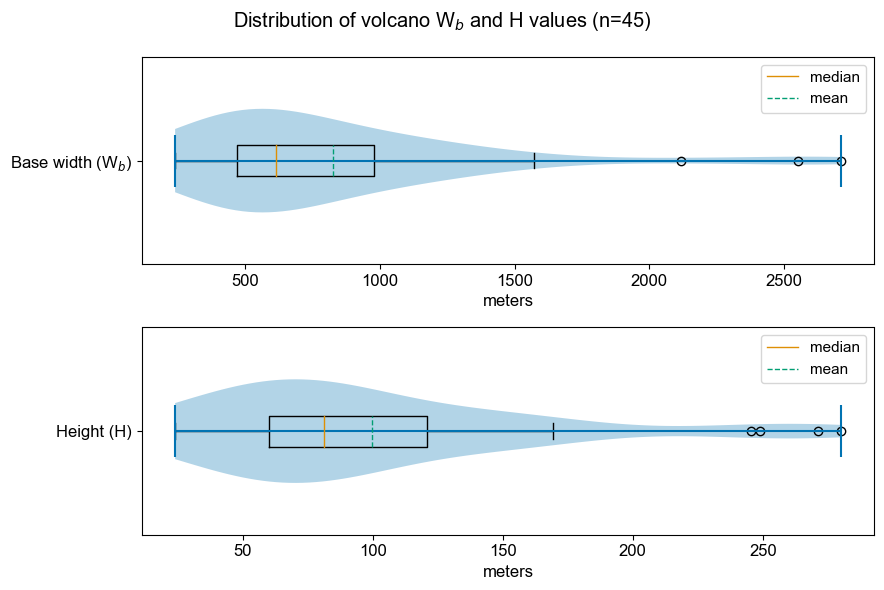

In [37]:
# Distribution of volcano volcano basa width and height values

fig, ([ax1, ax2]) = plt.subplots(2, 1, figsize=(9, 6))

# boxplot and violinplot for Base width (Wb)
bp1 = ax1.boxplot(dfm['wb'], showmeans=True, meanline=True, labels=["Base width (W$_b$)"], vert=False)
ax1.violinplot(dfm['wb'], vert=False)
ax1.legend([bp1['medians'][0], bp1['means'][0]], ['median', 'mean'], prop={'size': 11})
ax1.set_xlabel('meters')

# boxplot and violinplot for Height (H)
bp2 = ax2.boxplot(dfm['h'], showmeans=True, meanline=True, labels=["Height (H)"], vert=False)
ax2.violinplot(dfm['h'], vert=False)
ax2.legend([bp2['medians'][0], bp2['means'][0]], ['median', 'mean'], prop={'size': 11})
ax2.set_xlabel('meters')

plt.suptitle('Distribution of volcano W$_b$ and H values (n=45)')
plt.tight_layout()
plt.show()

### Figure 5. Distribution of basal width (Wb) and height (H) of the 45 characterized monogenetic volcanoes in the Macolod Corridor.

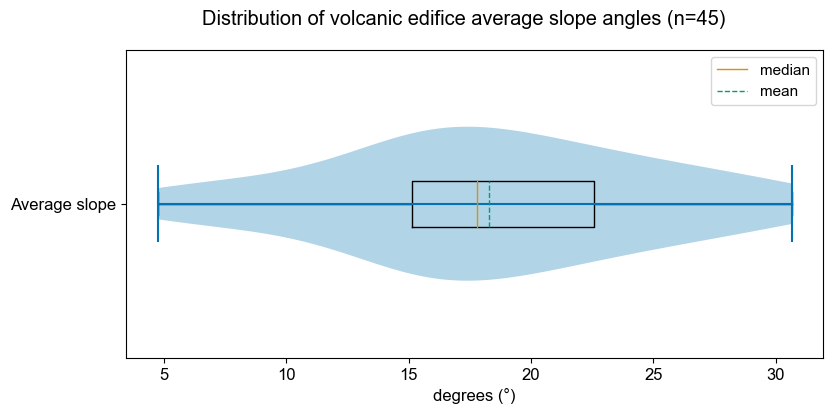

In [38]:
# Distribution of volcanic edifice average slope angles

fig, ax1 = plt.subplots(figsize=(9, 4))

# create boxplot and violinplot
bp1 = ax1.boxplot(dfm['slopemeantot'] ,showmeans=True, meanline=True, labels=["Average slope"], vert=False)
ax1.violinplot(dfm['slopemeantot'], vert=False)

# add legend
ax1.legend([bp1['medians'][0], bp1['means'][0]], ['median', 'mean'], prop={'size': 11})

# set x label and title
ax1.set_xlabel('degrees (°)')
plt.suptitle('Distribution of volcanic edifice average slope angles (n=45)')

# display plot
plt.show()

### Figure 6. Distribution of average slope angles of the whole edifices of the 45 characterized monogenetic volcanoes in the Macolod Corridor.

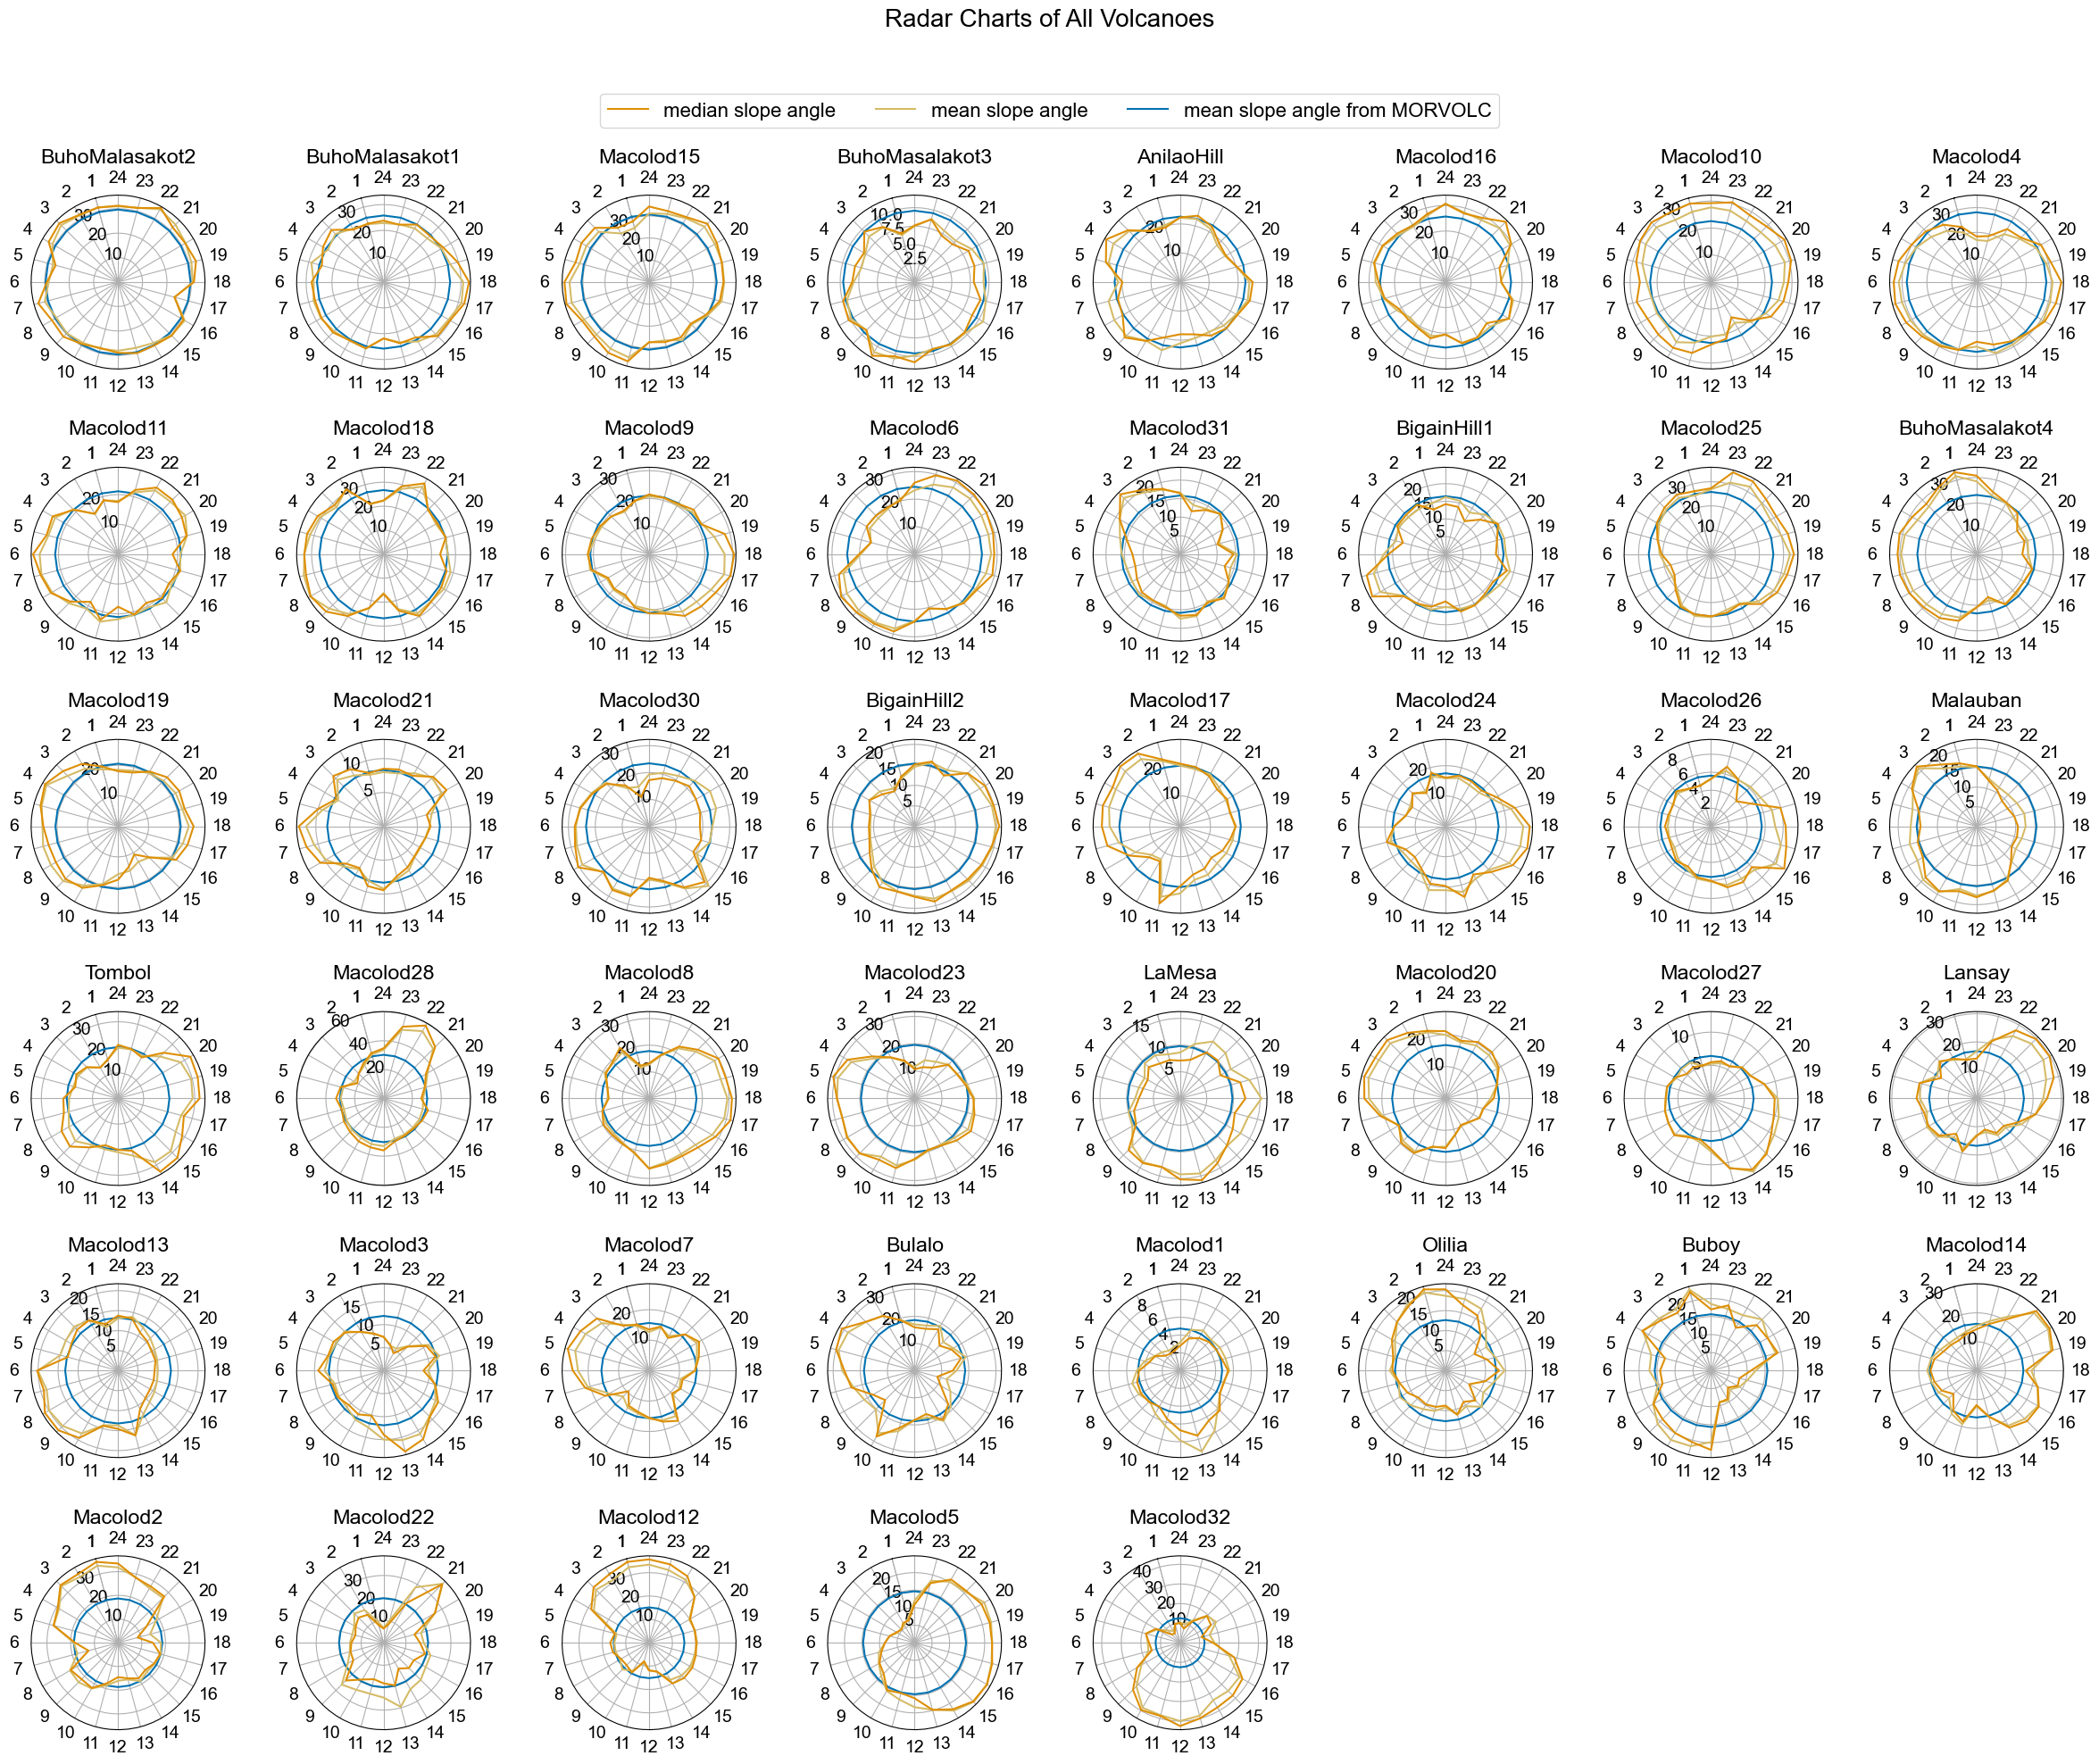

In [39]:
# Read in data from csv file
pivot_med_df = pd.read_csv('data/pivot_med_df_corridor.csv')

# Set font parameters for plots
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 14}

plt.rc('font', **font)

# Sort data by column 24 (sector) in descending order and set index to 'sector'
pivot_cov_sort = pivot_med_df.sort_values(by=24, axis=1, ascending=True).set_index('sector')

# Drop column 25 from sorted data
pivot_cov_sort = pivot_cov_sort.drop(25)

# Select only relevant columns from mean and slope total dataframes
pivot_mean_df = pivot_mean_df[pivot_cov_sort.columns]
pivot_slopetot_df = pivot_slopetot_df[pivot_cov_sort.columns]

def draw_radarcharts(title, dfmean, dfmed, dfs, variables, n_rows, n_cols):
    """
    Function to draw radar charts given the mean, median, and slope total dataframes
    for a set of variables (volcanoes).

    Parameters:
    title (str): Title for the set of radar charts
    dfmean (DataFrame): Dataframe containing mean slope angle data for each variable
    dfmed (DataFrame): Dataframe containing median slope angle data for each variable
    dfs (DataFrame): Dataframe containing slope total data for each variable
    variables (list): List of variables (volcanoes) for which to create radar charts
    n_rows (int): Number of rows of subplots
    n_cols (int): Number of columns of subplots
    """
    # set the figure size based on the number of rows and columns of subplots
    figwidth = n_cols * 3
    figheight = n_rows * 3.444
    fig = plt.figure(figsize=(figwidth,figheight))
    
    # create a subplot for each variable in the 'variables' list
    for i, var_name in enumerate(variables):
        # create a polar subplot
        ax = fig.add_subplot(n_rows, n_cols, i+1, polar=True)
        # get the categories for the radar chart
        categories = dfmean.index.tolist()
        categories = [*categories, categories[0]]
        # get the mean values for the variable and duplicate the first value to close the loop
        mean = dfmean[var_name].tolist()
        mean = [*mean, mean[0]]
        # get the median values for the variable and duplicate the first value to close the loop
        med = dfmed[var_name].tolist()
        med = [*med, med[0]]
        # get the slope angle values for the variable and duplicate the first value to close the loop
        slopetot = dfs[var_name].tolist()
        slopetot = [*slopetot, slopetot[0]]
        
        # set the offset and direction of the theta axis
        ax.set_theta_offset(np.pi / 2 + np.pi/12)
        ax.set_theta_direction(1)
        
        # create arrays of theta locations for each line to be plotted
        label_loc_mean = np.linspace(start=0, stop=2 * np.pi, num=len(mean))
        label_loc_med = np.linspace(start=0, stop=2 * np.pi, num=len(med))
        label_loc_slopetot = np.linspace(start=0, stop=2 * np.pi, num=len(slopetot))
        
        # plot the mean slope angle from MORVOLC values as a line on the radar chart
        plt.plot(label_loc_slopetot, slopetot, label='mean slope angle from MORVOLC', c='#0173b2')
        # plot the mean values for the slope angle as a line on the radar chart
        plt.plot(label_loc_mean, mean, label='mean slope angle', c='#d5bb67')
        # plot the median values for the slope angle as a line on the radar chart
        plt.plot(label_loc_med, med, label='median slope angle', c='#de8f05')
        
        # set the title of the subplot
        ax.set_title(var_name)
        # set the category labels on the theta axis
        lines, labels = plt.thetagrids(np.degrees(label_loc_mean), labels=categories)
    
    # add a title for the entire figure
    fig.suptitle(f"Radar Charts of {title}", fontsize=20)
    
    # reorder the legend items and create a legend for the entire figure
    handles, labels = ax.get_legend_handles_labels()
    order = [2,1,0]
    fig.legend([handles[idx] for idx in order], [labels[idx] for idx in order], ncol=3, loc='lower center', bbox_to_anchor=(0.5, 0.91),fontsize=16)
    
    # adjust the spacing of the subplots and display the figure
    fig.tight_layout(h_pad=3, rect=[0, 0.03, 1, .93]) 
    plt.show()
    
draw_radarcharts('All Volcanoes', pivot_mean_df, pivot_cov_sort, pivot_slopetot_df, pivot_cov_sort.columns, 6, 8)

### Figure 7. Sectorial values of median slope angles (gold), mean slope angles (light yellow), and whole-edifice average slope (blue) of monogenetic cones and domes in the Macolod Corridor.

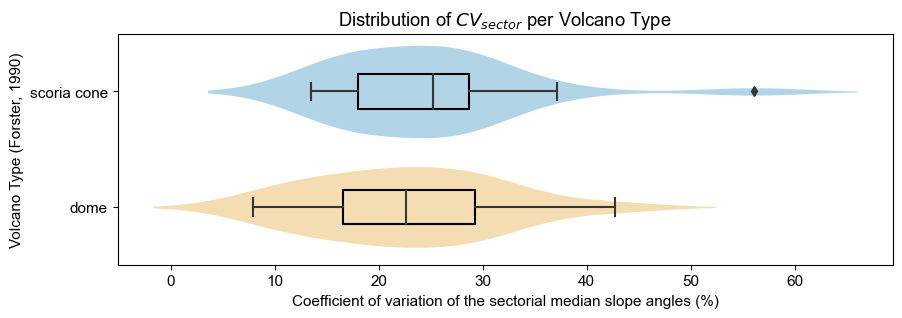

In [40]:
# Load data
pivot_med_df = pd.read_csv('data/pivot_med_df_corridor.csv')

# Select scoria cones and sort by median slope angle
pivot_med_df_cones = pivot_med_df[['sector','AnilaoHill','Buboy','BuhoMasalakot4','Lansay','Macolod10','Macolod11','Macolod13','Macolod14','Macolod19','Macolod20','Macolod22','Macolod23','Macolod28','Macolod30','Macolod31','Macolod32','Macolod4','Macolod6','Macolod7','Macolod8','Macolod9','Malauban','Tombol']]
cov_sorted_cones = pivot_med_df_cones.sort_values(by=24, axis=1, ascending=True).set_index('sector')
cov_sorted_cones = cov_sorted_cones.transpose()
cov_sorted_cones['type'] = 'scoria cone'
cov_sorted_cones = cov_sorted_cones[[25,'type']]

# Select domes and sort by median slope angle
pivot_med_df_domes = pivot_med_df[['sector','BigainHill1','BigainHill2','BuhoMalasakot1','BuhoMalasakot2','BuhoMasalakot3','Bulalo','LaMesa','Macolod1','Macolod15','Macolod16','Macolod17','Macolod18','Macolod2','Macolod21','Macolod24','Macolod25','Macolod26','Macolod27','Macolod3','Macolod5','Olilia']]
cov_sorted_domes = pivot_med_df_domes.sort_values(by=24, axis=1, ascending=True).set_index('sector')
cov_sorted_domes = cov_sorted_domes.transpose()
cov_sorted_domes['type'] = 'dome'
cov_sorted_domes = cov_sorted_domes[[25,'type']]

# Concatenate scoria cones and domes data
cov_all = pd.concat([cov_sorted_cones, cov_sorted_domes])
cov_all.columns = [''] * len(cov_all.columns)
cov_all.columns = ['cov', 'type']

# Set plot font
font = {'family' : 'Arial', 'weight' : 'normal', 'size' : 11}
plt.rc('font', **font)

# Create violin and box plot
plt.figure(figsize=(10,3))
ax = sns.violinplot(y='type', x='cov', data=cov_all, palette='colorblind', inner=None, linewidth=0, saturation=1)
plt.setp(ax.collections, alpha=.3) # set violin plot transparency
sns.boxplot(y='type', x='cov', data=cov_all, color=None, width=0.3, boxprops={'zorder': 2, 'facecolor':'none', 'edgecolor':'black'}, ax=ax).set(ylabel='Volcano Type (Forster, 1990)', xlabel ='Coefficient of variation of the sectorial median slope angles (%)',title=r'Distribution of $CV_{sector}$ per Volcano Type')

# Display plot
plt.show()


### Figure 8. Distribution of the coefficient of variation of the sectorial median slope angles (CVsector) of characterized monogenetic volcanoes in the Macolod Corridor, grouped according to volcano type.

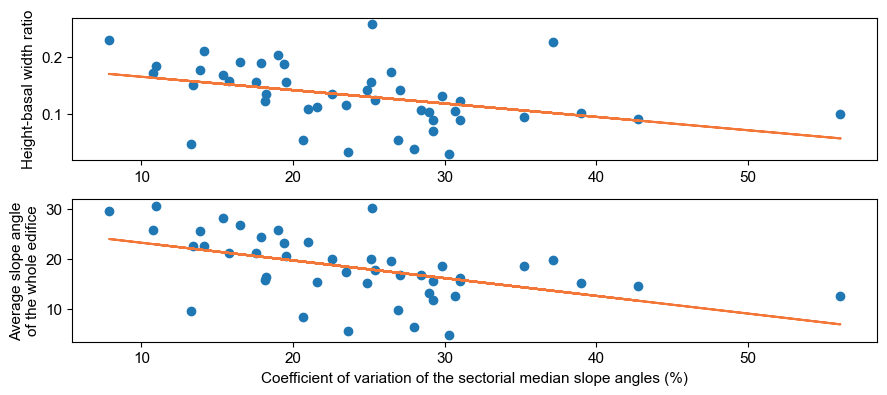

In [41]:
# CoV vs H/Wb

# Perform linear regression and get coefficients
a0, b0 = np.polyfit(dfm['cov'], dfm['h/wb'], 1)
a1, b1 = np.polyfit(dfm['cov'], dfm['slopemeantot'], 1)

# Create subplots for two scatterplots and their regression lines
fig, ([ax1, ax2]) = plt.subplots(2, 1, figsize=(9, 4))

# Scatterplot and regression line for H/Wb
ax1.scatter(dfm['cov'], dfm['h/wb'], color="#1f77b4")
ax1.plot(dfm['cov'], a0*dfm['cov']+b0, color='#f37738')
ax1.set_ylabel('Height-basal width ratio')

# Scatterplot and regression line for average slope angle
ax2.scatter(dfm['cov'], dfm['slopemeantot'],color="#1f77b4")
ax2.plot(dfm['cov'], a1*dfm['cov']+b1, color='#f37738')
ax2.set_ylabel('Average slope angle\nof the whole edifice')
ax2.set_xlabel('Coefficient of variation of the sectorial median slope angles (%)')

# Adjust subplot spacing and display plot
plt.tight_layout(h_pad=1)
plt.show()

### Figure 9. Plots of height-basal width ratio and average slope angle vs. coefficient of variation of the sectorial median slope angles. The orange lines of best fit illustrate the medium negative linear relationship of CVsector with H/Wb and total average slope, respectively.

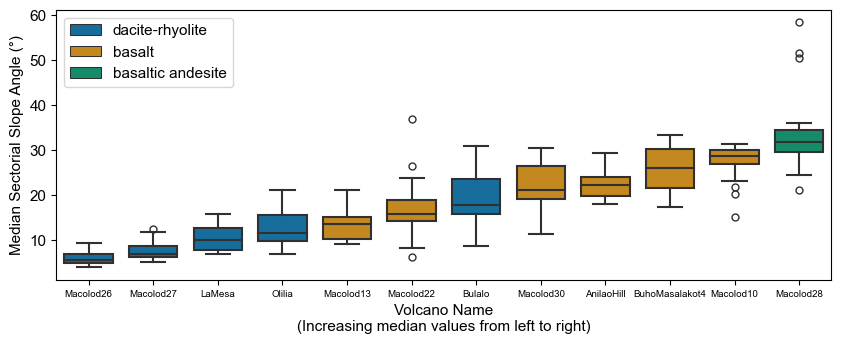

In [42]:
# Read in data from CSV file and filter for specific lithologies
df = pd.read_csv('data/sectorial_results_corridor.csv')
df = df.loc[(df["lithology"] == "dacite-rhyolite") | (df["lithology"] == "basalt") | (df["lithology"] == "basaltic andesite")]

# Set color palette and hue order for boxplot
colors = ["#0173b2", "#de8f05", "#029e73", "#ffffff"]
sns.set_palette(sns.color_palette(colors))
hue_order=["dacite-rhyolite","basalt","basaltic andesite"]

# Define flier properties and plot boxplot
flierprops = dict(marker='o', markerfacecolor='none')
plt.figure(figsize=(10,3.5))
sns.boxplot(data=df, y="sector_med", width=0.75, x="volcano", hue="lithology", flierprops=flierprops, hue_order=hue_order, dodge=False, order=df.groupby("volcano")["sector_med"].median().sort_values(ascending=True).index.tolist())

# Sort dataframe by median volcano values and rotate x-axis tick labels
sorter = df.groupby("volcano")["sector_med"].median().sort_values(ascending=True).index.tolist()
df_median_sort = df.sort_values(by="volcano", key=lambda column: column.map(lambda e: sorter.index(e)), inplace=False)
plt.xticks(fontsize=7, rotation=0)
plt.xlabel('Volcano Name\n(Increasing median values from left to right)')

# Set y-axis label and legend location
plt.ylabel('Median Sectorial Slope Angle (°)')
plt.legend(loc='upper left')

# Display plot
plt.show()

### Figure 11. Boxplots showing the ranges of the median slope angles of the sectors of volcanoes in the Macolod Corridor with available geochemical data, plotted according to increasing median values from left to right.

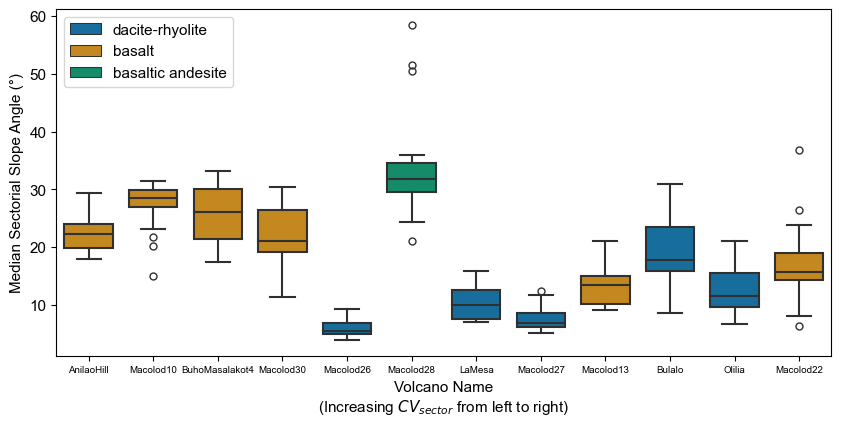

In [43]:
# Update font style
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
font = {'family': 'Arial', 'weight': 'normal', 'size': 11}
plt.rc('font', **font)

# Read data and filter by lithology
df = pd.read_csv('data/sectorial_results_corridor.csv')
df = df.loc[(df["lithology"] == "dacite-rhyolite") | (df["lithology"] == "basalt") | (df["lithology"] == "basaltic andesite")]

# Set color palette and hue order
colors = ["#0173b2", "#de8f05", "#029e73", "#ffffff"]
sns.set_palette(sns.color_palette(colors))
hue_order = ["dacite-rhyolite", "basalt", "basaltic andesite"]

# Set boxplot properties and create plot
flierprops = dict(marker='o', markerfacecolor='none')
plt.figure(figsize=(10, 4.5))
sns.boxplot(data=df, y="sector_med", width=0.75, x="volcano", hue="lithology", flierprops=flierprops, hue_order=hue_order, dodge=False, order=df.groupby("volcano")["cov"].median().sort_values(ascending=True).index.tolist())

# Add legend, set tick labels, and axis labels
plt.legend(loc='upper left')
plt.xticks(fontsize=7, rotation=0)
plt.xlabel('Volcano Name\n(Increasing $CV_{sector}$ from left to right)')
plt.ylabel('Median Sectorial Slope Angle (°)')

# Sort data by volcano and set tick label font weights
sorter = df.groupby("volcano")["cov"].median().sort_values(ascending=True).index.tolist()
df_median_sort = df.sort_values(by="volcano", key=lambda column: column.map(lambda e: sorter.index(e)), inplace=False)

# Show plot
plt.show()

### Figure 12. Boxplots showing the ranges of the median slope angles of the sectors of volcanoes in the Macolod Corridor with available geochemical data, plotted according to increasing CVsector i.e., asymmetry, from left to right.

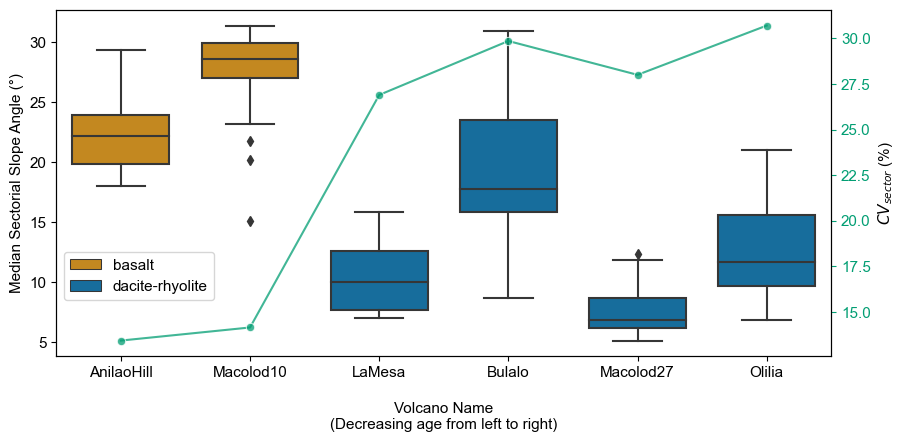

In [44]:
# define volcano sorting order
age = ["AnilaoHill","Macolod10","LaMesa","Bulalo","Macolod27","Olilia"]
sorter = ["AnilaoHill", "Macolod10", "LaMesa", "Bulalo", "Macolod27", "Olilia"]

# read data from CSV file
df = pd.read_csv('data/sectorial_results_corridor.csv')

# create plot figure with 2 subplots
fig, ax1 = plt.subplots(figsize=(10,4.5))
ax2 = ax1.twinx()

# set color palette for plot
colors = ["#de8f05", "#0173b2"]
sns.set_palette(sns.color_palette(colors))
hue_order=["basalt","dacite-rhyolite"]

# create boxplot for sectorial median slope angles by volcano and lithology
sns.boxplot(data=df[df["volcano"].isin(age)], y="sector_med", width=0.75, x="volcano", hue="lithology", hue_order=hue_order, dodge=False, order=age, ax=ax1)

# create line plot for median coefficient of variation by volcano and sort by volcano age
sns.lineplot(data=pd.to_numeric(df[df["volcano"].isin(age)].groupby("volcano")["cov"].median().reindex(index=sorter).reset_index()['cov']), marker='o', alpha=0.75, color='#029e73', sort=False, ax=ax2)

# set axis labels and tick parameters
ax1.set_ylabel('Median Sectorial Slope Angle (°)')
ax1.set_xlabel('\nVolcano Name\n(Decreasing age from left to right)')
ax2.set_ylabel('$CV_{sector}$ (%)')
ax2.tick_params(axis='y', colors='#029e73')
plt.xticks(fontsize=11, rotation=0)

# move legend and set title
ax1.get_legend().set_title(None)
sns.move_legend(ax1, "lower left", bbox_to_anchor=(0,.14))

# show the plot
plt.show()

### Figure 13. Boxplots showing the ranges of the median slope angles of the sectors of the 6 volcanoes with available geochronological data, ordered from left to right according to decreasing age. Geochronological ages are also indicated below the volcano names. The green line plot illustrates the trend of the coefficient of variation of the sectorial median slope angles (CVsector) across the 6 volcanoes.

# Additional plots
- All boxplots sorted according to increasing median values
- All boxplots sorted according to increasing CVsector

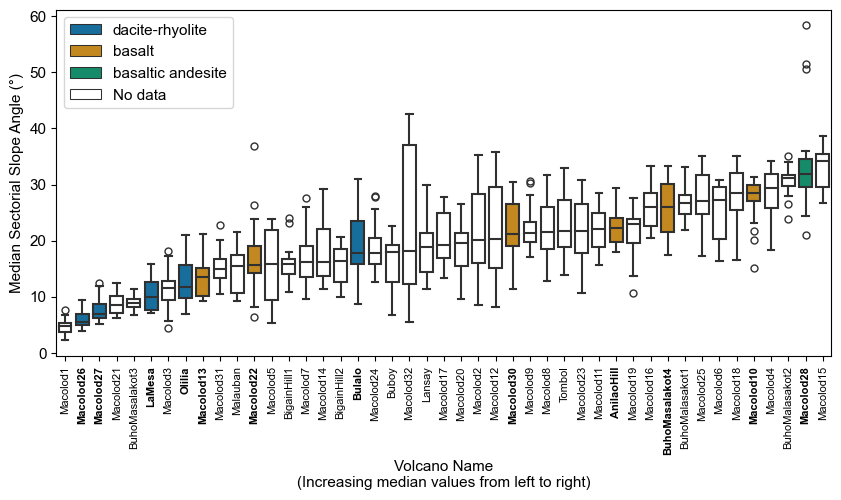

In [45]:
# Read data from csv file
df = pd.read_csv('data/sectorial_results_corridor.csv')

# Set color palette and order of hue levels
colors = ["#0173b2", "#de8f05", "#029e73", "#ffffff"]
sns.set_palette(sns.color_palette(colors))
hue_order=["dacite-rhyolite","basalt","basaltic andesite","No data"]

# Create boxplot with seaborn
flierprops = dict(marker='o', markerfacecolor='none')
plt.figure(figsize=(10,4.5))
sns.boxplot(data=df, y="sector_med", width=0.75, x="volcano", hue="lithology", flierprops=flierprops, hue_order=hue_order, dodge=False, order=df.groupby("volcano")["sector_med"].median().sort_values(ascending=True).index.tolist())

# Sort data by median of "sector_med" column for each "volcano"
sorter = df.groupby("volcano")["sector_med"].median().sort_values(ascending=True).index.tolist()
df_median_sort = df.sort_values(by="volcano", key=lambda column: column.map(lambda e: sorter.index(e)), inplace=False)

# Set plot labels and font sizes
plt.legend(loc='upper left')
plt.xticks(fontsize=8, rotation=90)
plt.xlabel('Volcano Name\n(Increasing median values from left to right)')
plt.ylabel('Median Sectorial Slope Angle (°)')

# Set font weight for x-axis tick labels
MP_TICKSIZE = df_median_sort.drop_duplicates(subset = ["volcano"])["font_weight"].tolist()
count = 0
for tick in plt.gca().xaxis.get_major_ticks():
    tick.label1.set_fontweight(MP_TICKSIZE[count])
    count += 1

# Display the plot
plt.show()

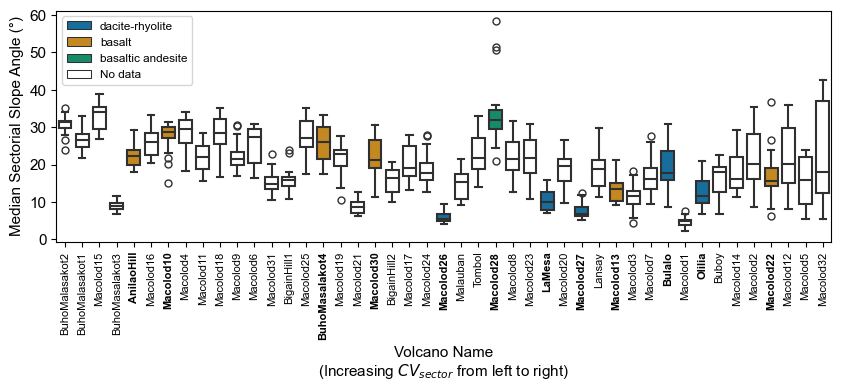

In [46]:
# Read data from CSV file
df = pd.read_csv('data/sectorial_results_corridor.csv')

# Define colors and hue order
colors = ['#0173b2', '#de8f05', '#029e73', '#ffffff']
hue_order = ['dacite-rhyolite', 'basalt', 'basaltic andesite', 'No data']

# Define flier properties for boxplot
flierprops = dict(marker='o', markerfacecolor='none')

# Create boxplot
plt.figure(figsize=(10, 3))
sns.boxplot(data=df, y='sector_med', width=0.75, x='volcano', hue='lithology', flierprops=flierprops, hue_order=hue_order, dodge=False, order=df.groupby('volcano')['cov'].median().sort_values(ascending=True).index.tolist())

# Set legend, x-axis ticks, and labels
plt.legend(loc='upper left', fontsize=8.5)
plt.xticks(fontsize=8, rotation=90)
plt.xlabel('Volcano Name\n(Increasing $CV_{sector}$ from left to right)')
plt.ylabel('Median Sectorial Slope Angle (°)')

# Set font weights for x-axis ticks based on the "font_weight" column in the dataframe
sorter = df.groupby('volcano')['cov'].median().sort_values(ascending=True).index.tolist()
df_median_sort = df.sort_values(by='volcano', key=lambda column: column.map(lambda e: sorter.index(e)), inplace=False)
MP_TICKSIZE = df_median_sort.drop_duplicates(subset=['volcano'])['font_weight'].tolist()
count = 0
for tick in plt.gca().xaxis.get_major_ticks():
    tick.label1.set_fontweight(MP_TICKSIZE[count])
    count += 1

# Display plot
plt.show()
